In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
df=pd.read_csv("features_embedded.csv")
df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

labels=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=df.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [3]:
properties=[
'time_level_1',
'time_level_2',
'time_level_3',
'time_level_4',
'zone_highway',
'zone_market_place',
'zone_normal_city',
'Population_density_dense',
'Population_density_medium',
'Population_density_sparse',
'Weekend/day_Week-day',
'Weekend/day_Week-end']

In [4]:
#population staistics
population=features.describe()[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi']].T[['count','mean','std']]

# P-test

In [5]:
def p_value_calculation(f_name,n,x_bar,sigma):
    z_stat=(x_bar-population.loc[f_name,'mean'])/((sigma/(n**0.5))+1e-5)#population.loc[f_name,'std']#
    if z_stat>=0:
        return 100-np.round(st.norm.cdf(z_stat)*100,2)
    else:
        return np.round(st.norm.cdf(z_stat)*100,2)

In [6]:
def check_p_for_type(columns,features,remarks=None):
    fig=plt.figure(figsize=(20,15))
    fig.suptitle('p-test: {}'.format(remarks),size=20)
    for i,column in enumerate(columns):
        curr_feat=features[features[column].round()==1].describe()[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi']].T[['count','mean','std']].reset_index()

        curr_feat['p_val']=curr_feat[['index', 'count', 'mean', 'std']].apply(lambda e:p_value_calculation(e[0],e[1],e[2],e[3]),axis=1)
        curr_feat.index=curr_feat['index']

        #print('For column:',column)
        #print(dict(curr_feat['p_val']))
        
        ax=fig.add_subplot(3,4,i+1)
        curr_feat.p_val.plot(kind='bar',color=sns.color_palette(),ax=ax)
        ax.hlines(5,-0.5,4.5,colors='k',linestyles='dashed')
        ax.set_ylabel('p_value<%>:{}'.format(column))
        ax.set_ylim(0,50)
        ax.set_xlabel('')
        ax.tick_params(axis='x', labelrotation=17)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)


# Before SMOTE

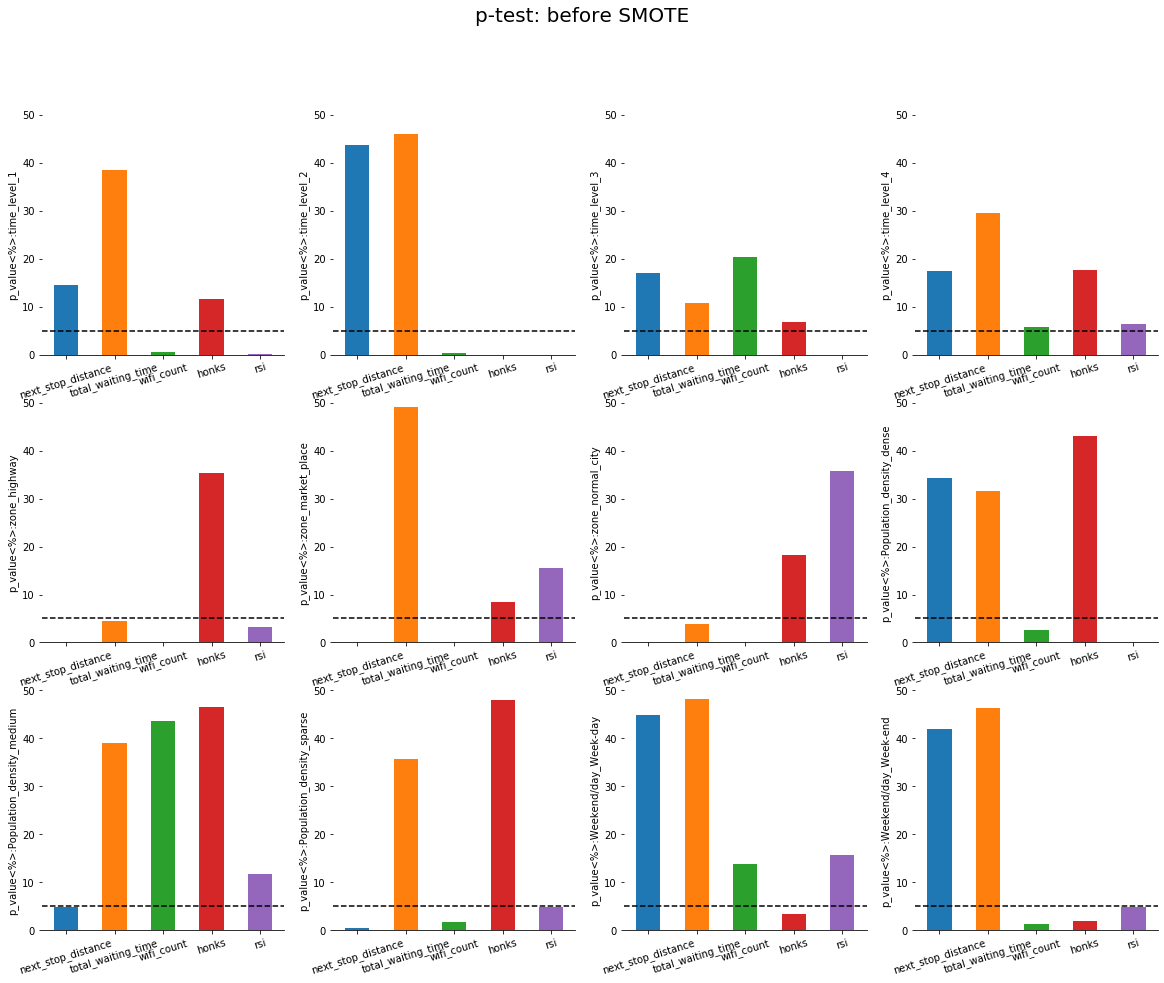

In [7]:
check_p_for_type(properties,features,'before SMOTE')

# After SMOTE

In [8]:
def get_feature_set_for(target_column):
    df=pd.read_csv("features_embedded.csv")
    df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

    labels=df[[target_column]].values
    features=df.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

    oversample = SMOTE()
    features,labels = oversample.fit_resample(features,labels)
    labels=labels.reshape(-1,1)
    features[target_column]=labels
    return features

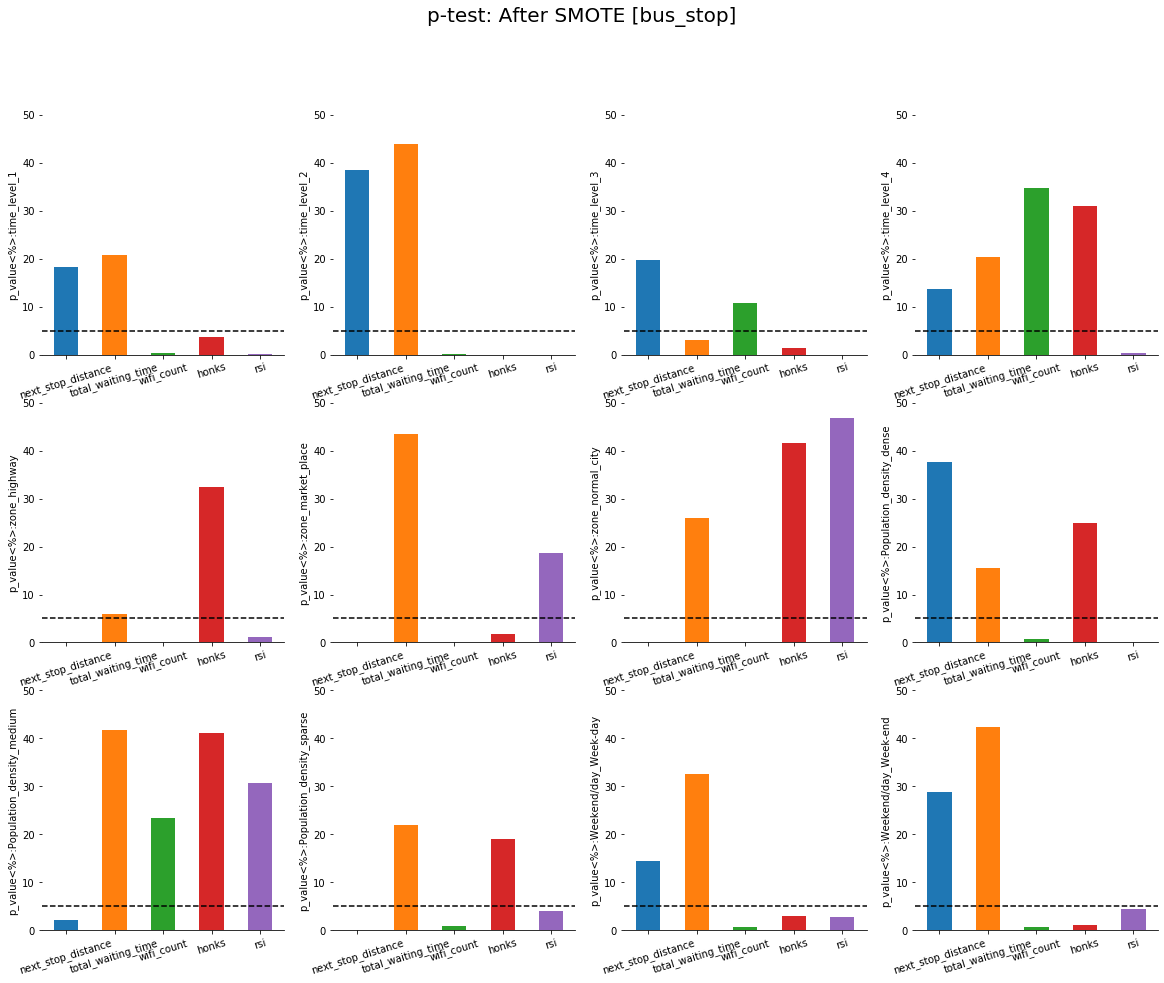

In [9]:
check_p_for_type(properties,get_feature_set_for('bus_stop'),'After SMOTE [bus_stop]')

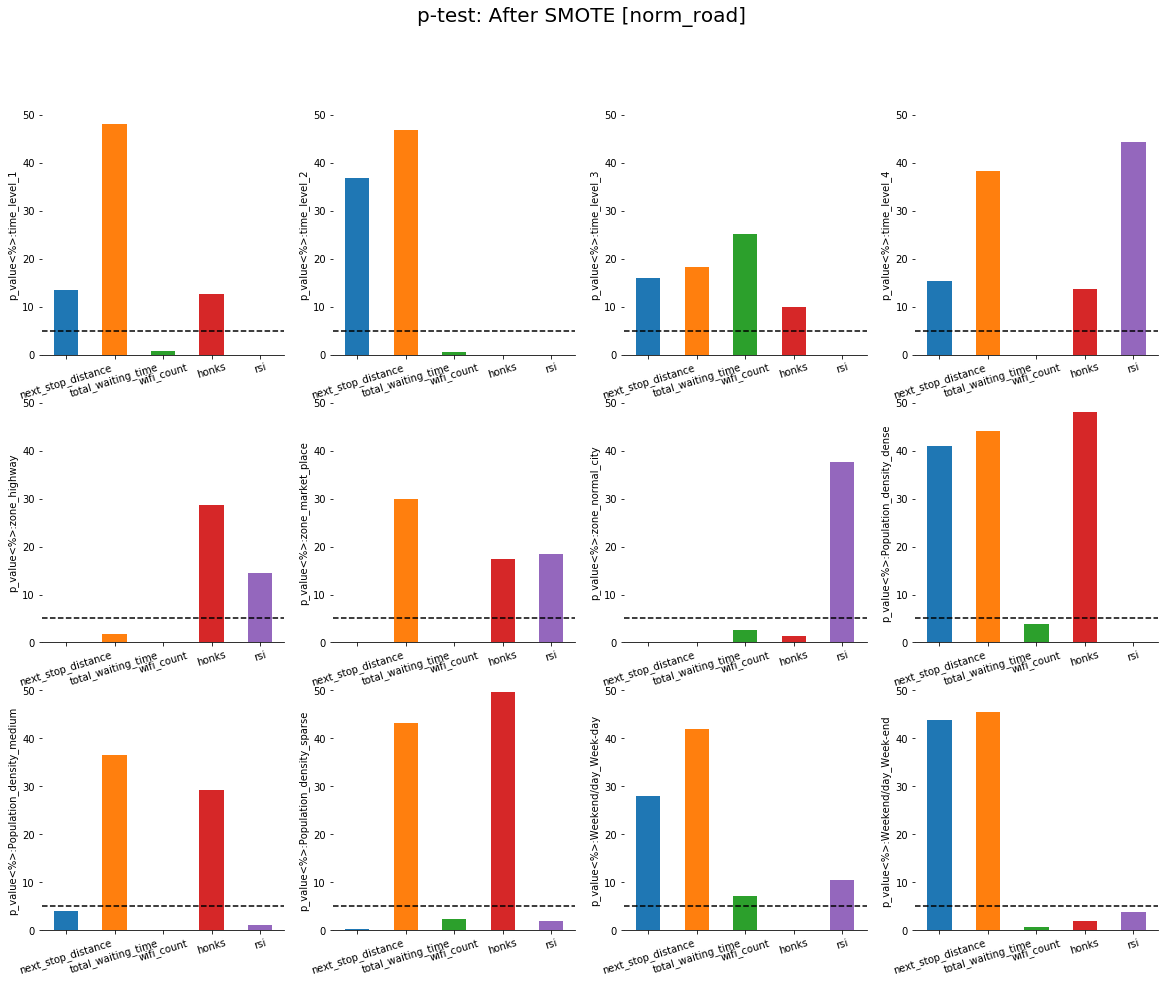

In [10]:
check_p_for_type(properties,get_feature_set_for('norm_road'),'After SMOTE [norm_road]')

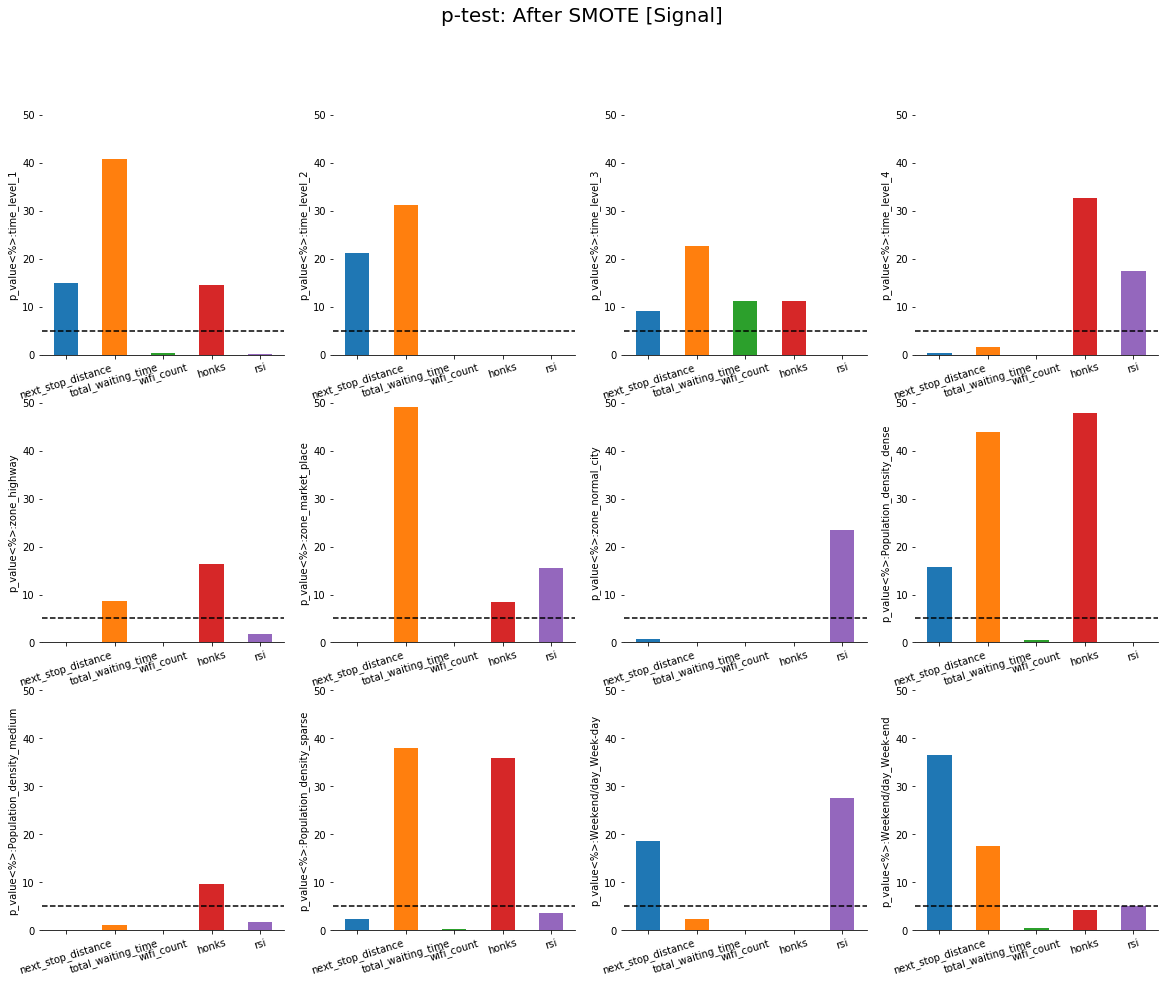

In [11]:
check_p_for_type(properties,get_feature_set_for('Signal'),'After SMOTE [Signal]')

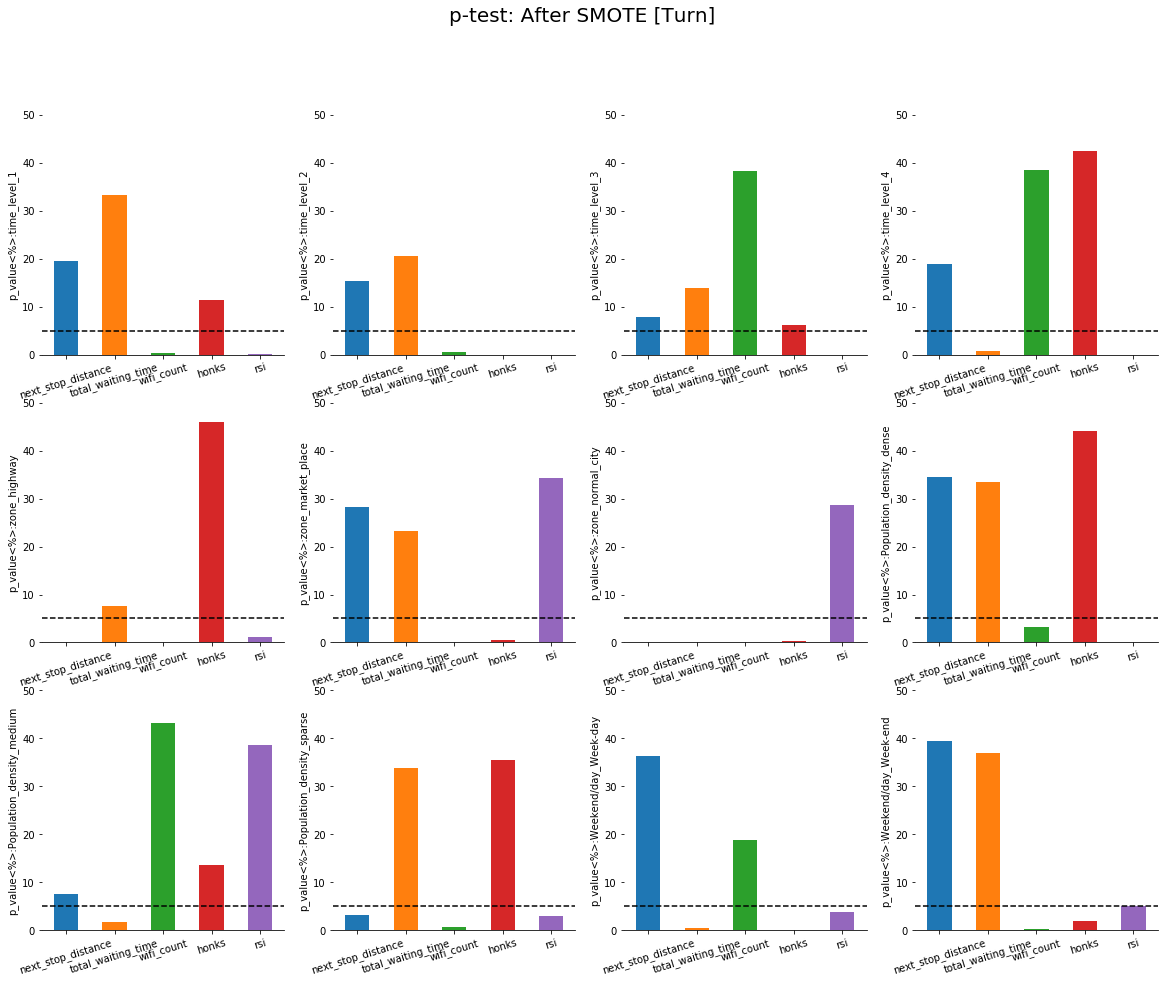

In [12]:
check_p_for_type(properties,get_feature_set_for('Turn'),'After SMOTE [Turn]')

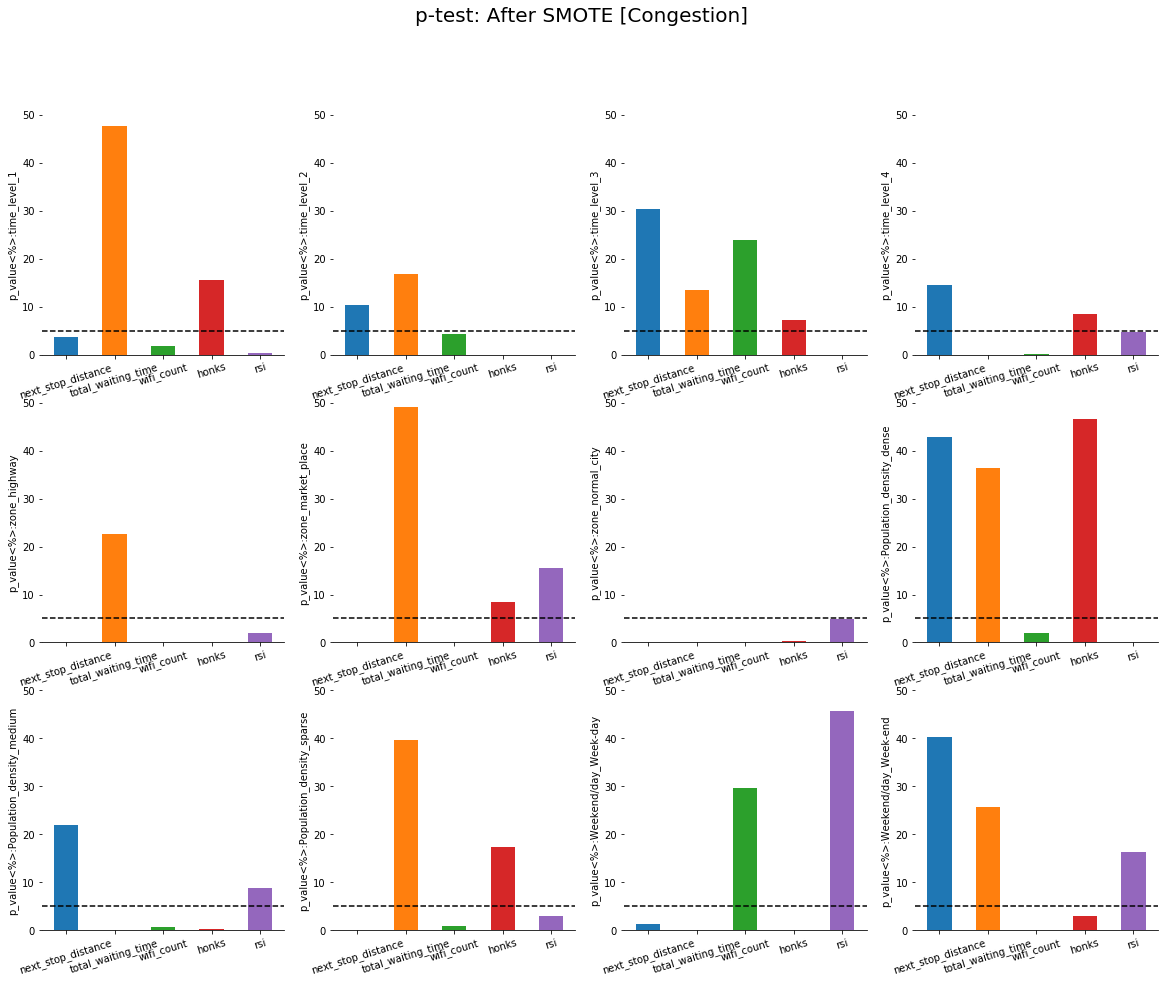

In [13]:
check_p_for_type(properties,get_feature_set_for('Congestion'),'After SMOTE [Congestion]')

## high p-value means specific data is similar to the population (threshold :5%)

# Stacked-Bar charts

In [14]:
#def plot_pie_plots
def get_normal_data():
    df=pd.read_csv("features_embedded.csv")
    df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)
    return df
def plot_stacked_bar_plots(target_column,is_SMOTE=False):
    zeros=[]
    ones=[]
    for prop in properties:
        df=get_feature_set_for(target_column) if is_SMOTE else get_normal_data()
        classes=dict(df[df[prop]==1][target_column].value_counts())
        try:
            zeros.append(classes[0])
        except:
            zeros.append(0)
        try:
            ones.append(classes[1])
        except:
            ones.append(0)

    fig=plt.figure(figsize=(15,5))
    fig.suptitle(target_column,size=16)
    ax=fig.add_subplot(111)
    ax.bar(properties, zeros,label='Not {}'.format(target_column))
    ax.bar(properties, ones,bottom=zeros,label='{}'.format(target_column))
    ax.tick_params(axis='x', labelrotation=30)
    ax.set_ylabel('#examples')
    ax.legend(loc='upper left')
    plt.show()

# Without SMOTE

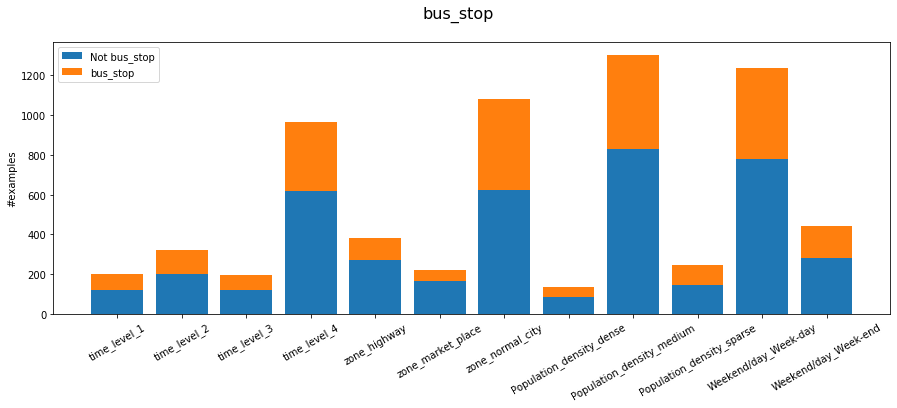

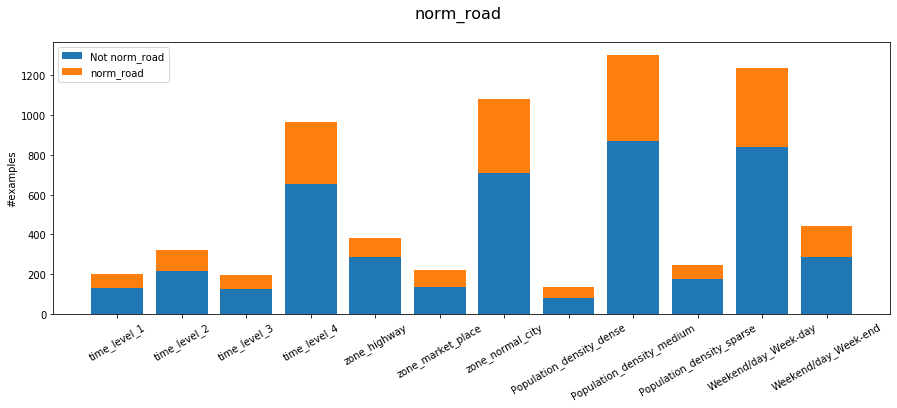

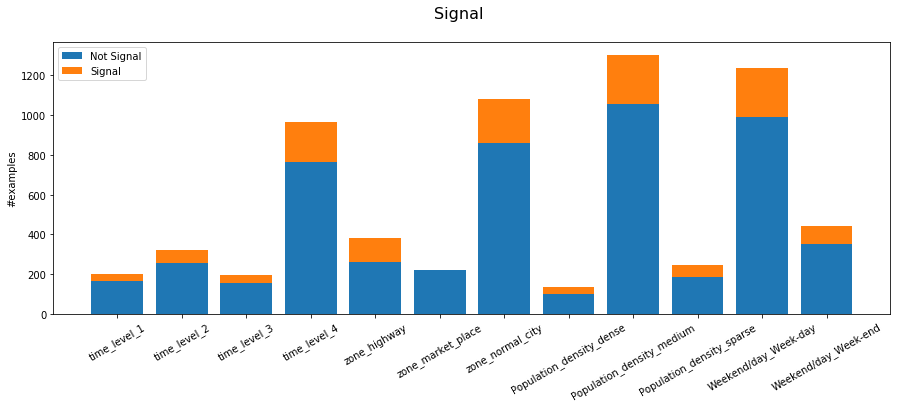

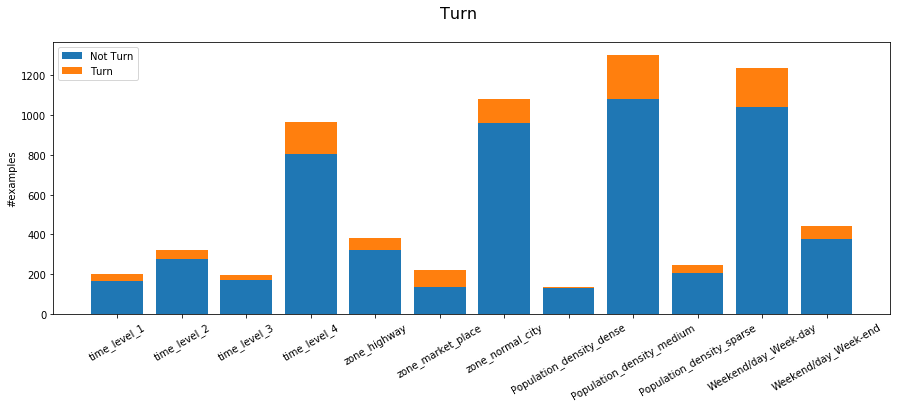

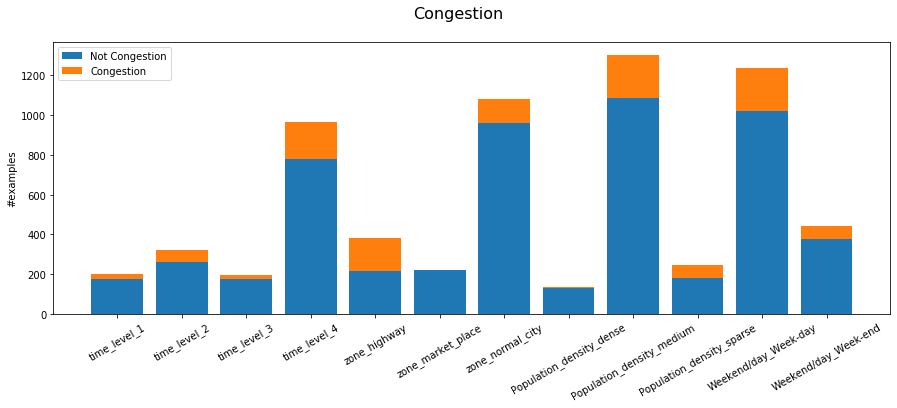

In [15]:
plot_stacked_bar_plots('bus_stop')
plot_stacked_bar_plots('norm_road')
plot_stacked_bar_plots('Signal')
plot_stacked_bar_plots('Turn')
plot_stacked_bar_plots('Congestion')

# With SMOTE

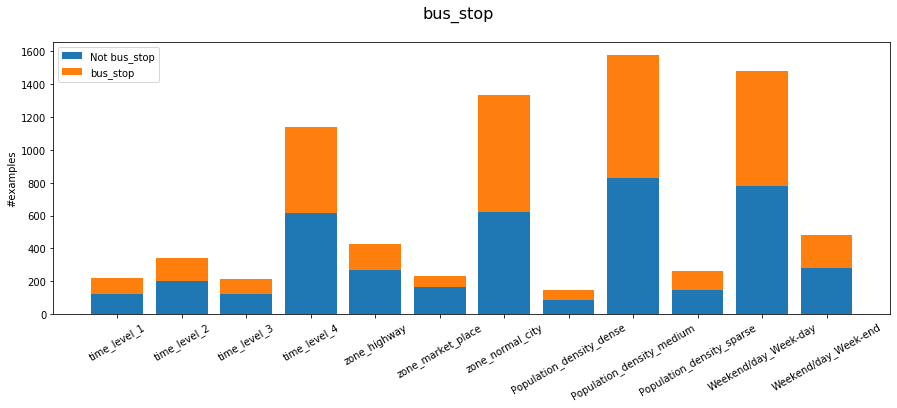

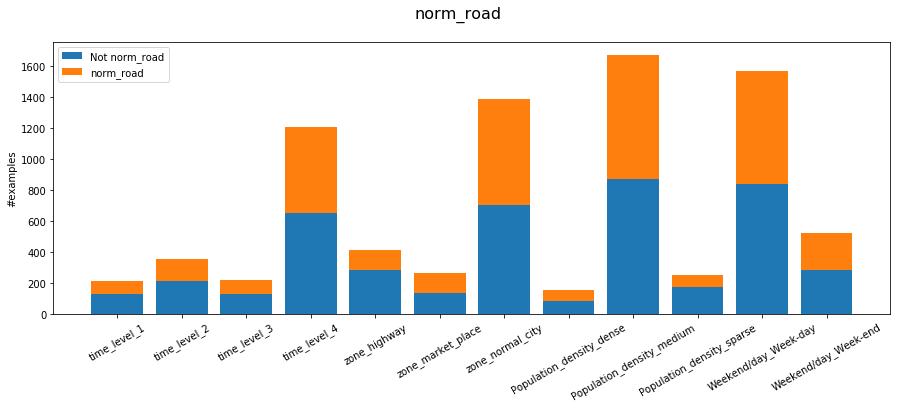

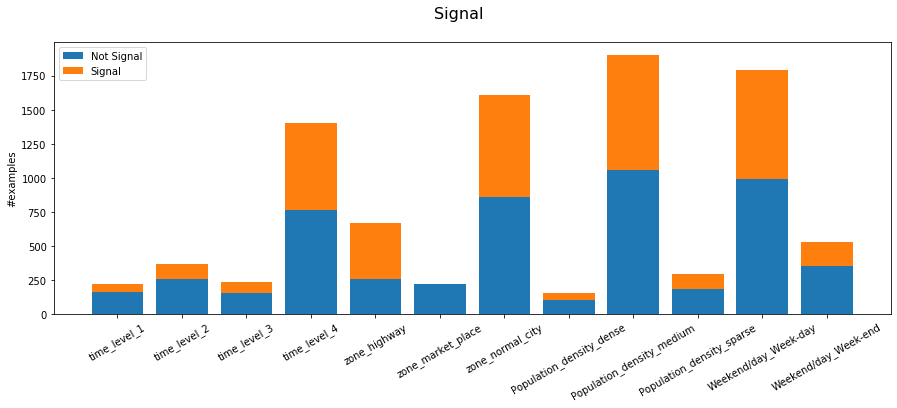

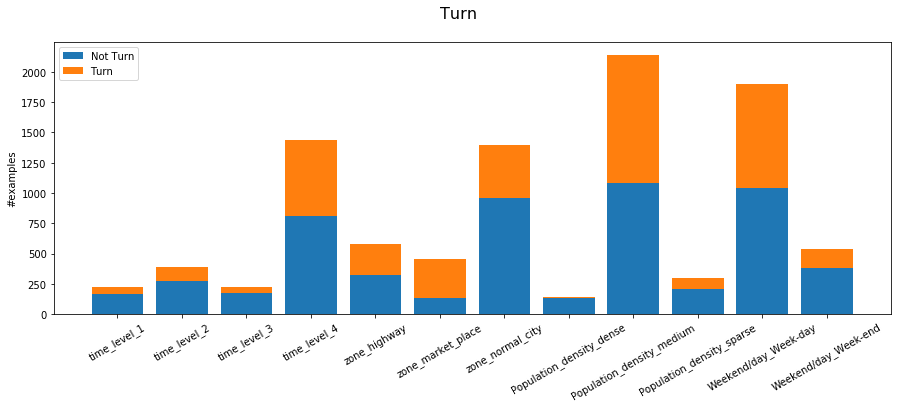

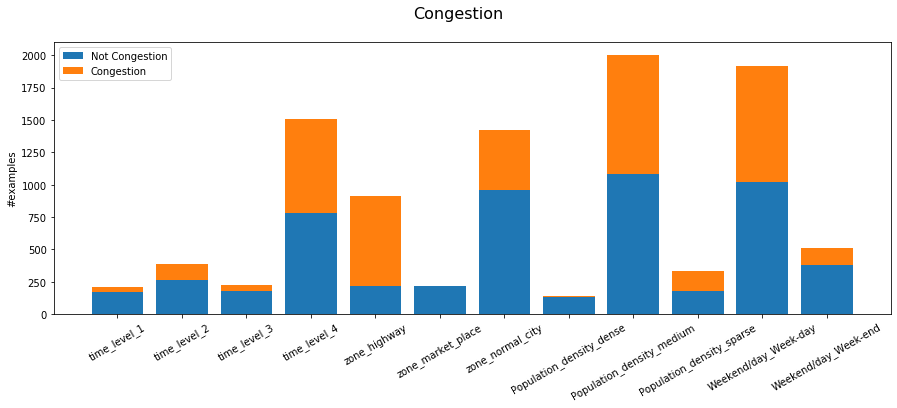

In [16]:
plot_stacked_bar_plots('bus_stop',is_SMOTE=True)
plot_stacked_bar_plots('norm_road',is_SMOTE=True)
plot_stacked_bar_plots('Signal',is_SMOTE=True)
plot_stacked_bar_plots('Turn',is_SMOTE=True)
plot_stacked_bar_plots('Congestion',is_SMOTE=True)

In [17]:
#DONE